In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [73]:
class Mean_Shift:
    
    def __init__(self, BW=None, radius_norm_step=100):
        self.BW=BW
        if not self.BW ==None:
            self.radius = BW/2
        self.radius_norm_step = radius_norm_step
        
        
    def fit(self, data):
        
        if self.BW ==None:
            all_data_centroid = np.average(data,axis=0)
            # get a reasonable large initial radius to work with
            all_data_norm = np.linalg.norm(all_data_centroid) 
            self.radius = all_data_norm/self.radius_norm_step
            
        
        centroids= {}
        
        for i in range (len(data)):
            centroids[i] = data[i]
            
        weights = [i for i in range(self.radius_norm_step)][::-1] # reverese sequence from 99 to 0 using [::-1]
        
        while True:
            new_centroids = []
            
            for i in centroids:
                in_BW = [] # data within the bandwidth
                centroid = centroids[i]
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance==0:
                        distance=1.0e-5
                    
                    weight_index= int(distance/self.radius) # linear inverse weighting based on distance from centroids
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                        
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_BW += to_add
                                        
#                     if np.linalg.norm(featureset-centroid) < self.radius: 
#                         in_BW.append(featureset)
            
                new_centroid = np.average(in_BW,axis=0)
                new_centroids.append(tuple(new_centroid)) # array is converted to a tuple
            
            # set works with tuples and it gives us the unique array
            # while, np.unique just gives us unique elements
            uniques = sorted(list(set(new_centroids))) 
            
            to_pop = []
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            
            optimized = True
            for i in centroids:
                if not np.array_equal(centroids[i],prev_centroids[i]):
                    optimized =False
                    
                if not optimized:
                    break
                    
            if optimized:
                break
    
        self.centroids = centroids
        
        self.classifications ={}
        
        for i in range (len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
        
        
    def predict (self,data):
        distances = [np.linalg.norm(featureset-self.centorids) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
            

In [74]:
X=np.array([[1,2],
           [1.5,1.8],
           [5,8],
           [8,8],
           [1,0.6],
           [9, 11],
           [8,2],
           [10,2],
           [9,3]])

In [75]:
clf = Mean_Shift()
clf.fit(X)
centroids=clf.centroids

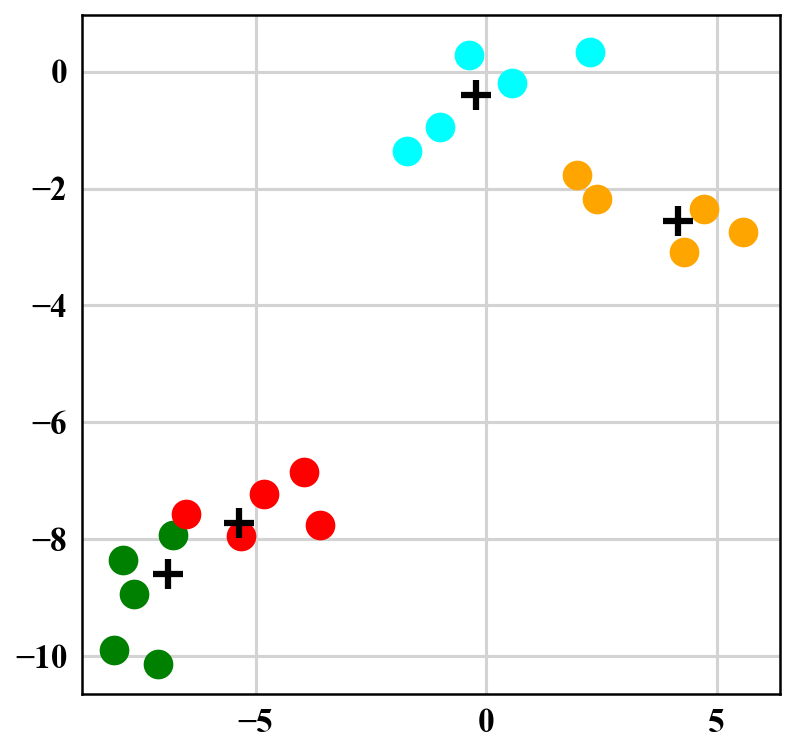

In [9]:
colors=10*['green','red','cyan','orange','gold','black']
fig = plt.figure(figsize=(6,6), dpi=150, facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(featureset[0],featureset[1],s=150, lw=2, c=color)

for c in centroids:
    ax.scatter(centroids[c][0],centroids[c][1],s=200,marker='+',c='k',lw=3)
ax.grid(True)

In [52]:
from sklearn.datasets.samples_generator import make_blobs

In [63]:
X, classified = make_blobs(n_samples=20, n_features=3, centers=4)
clf=None
clf = Mean_Shift()
clf.fit(X)
centroids=clf.centroids

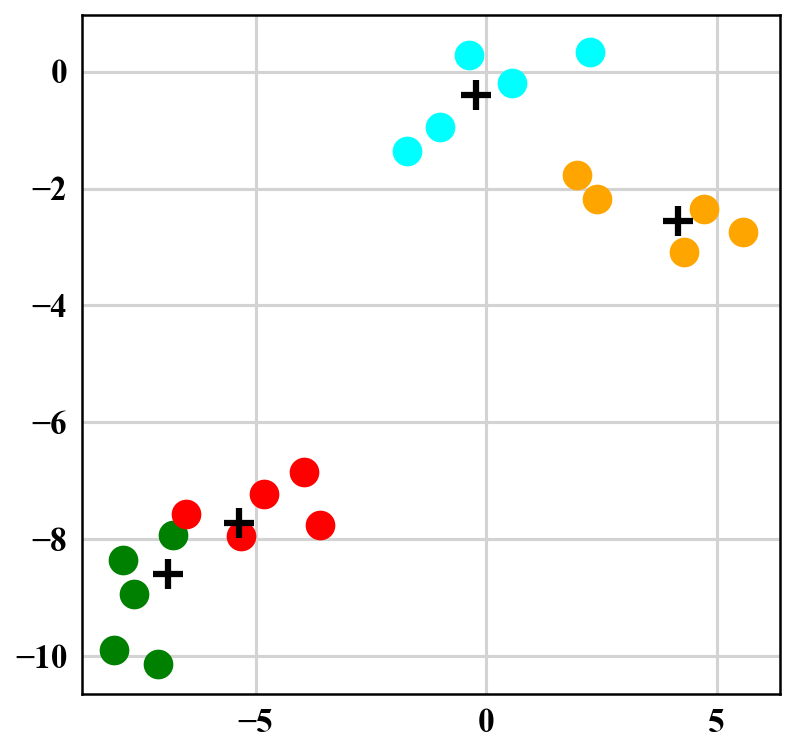

In [10]:
colors=10*['green','red','cyan','orange','gold','black']
fig = plt.figure(figsize=(6,6), dpi=150, facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(featureset[0],featureset[1],s=150, lw=2, c=color)

for c in centroids:
    ax.scatter(centroids[c][0],centroids[c][1],s=200,marker='+',c='k',lw=3)
ax.grid(True)